In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
experiment_df = pd.read_csv("/home/kaiyuan/Desktop/ky_code/affcon/diplomacy-betrayal/output/dataset_sampling/cnn/dataset_sampling_29_F1_pts_cnn.csv")

/home/kaiyuan/anaconda3/envs/TF2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/kaiyuan/anaconda3/envs/TF2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/kaiyuan/anaconda3/envs/TF2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

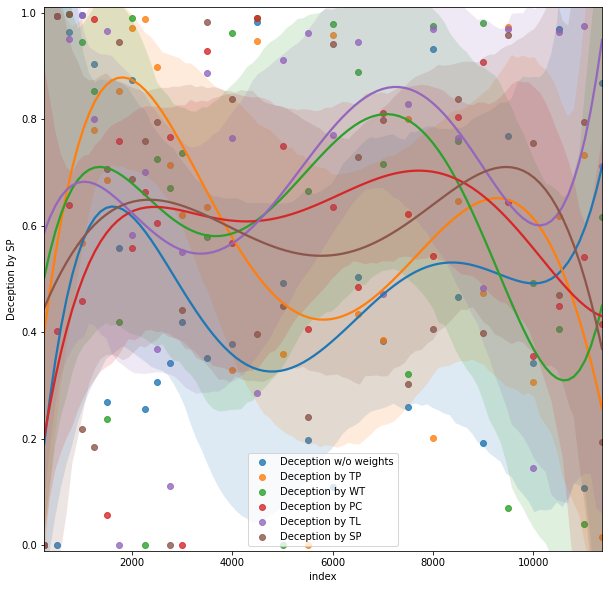

In [3]:
# predict_option = ['deception', 'rapport']
predict_option = ['deception']
fig, ax = plt.subplots(figsize=(10,10))
ax.set_ylim([-0.01, 1.01])
ax.set_xlim([249, 11367])

for option in predict_option:
    if option == "rapport":
        # to drop these
        row_names = [0,2,4,6,8,10]
    else:
        # to drop these
        row_names = [1,3,5,7,9,11]

    experiment_df_option = experiment_df.drop(row_names)
    
    exp_plot_df = experiment_df_option.T.reset_index()
    rename_col_names = {0: 'Deception w/o weights',
                        1: 'Rapport w/o weights',
                        2: 'Deception by TP',
                        3: 'Rapport by TP',
                        4: 'Deception by WT',
                        5: 'Rapport by WT',
                        6: 'Deception by PC',
                        7: 'Rapport by PC',
                        8: 'Deception by TL',
                        9: 'Rapport by TL',
                        10: 'Deception by SP',
                        11: 'Rapport by SP'}
    exp_plot_df = exp_plot_df.rename(columns=rename_col_names)
    exp_plot_df['index'] = exp_plot_df['index'].apply(lambda x: int(x))
#     exp_plot_df = exp_plot_df.set_index('index')
    
#     sns.lmplot(data=exp_plot_df.iloc[:, :2], order=2)
    
    order = 5
    
    sns.regplot('index', 'Deception w/o weights', data=exp_plot_df, order=order, label='Deception w/o weights', ax=ax)
    sns.regplot('index', 'Deception by TP', data=exp_plot_df, order=order, label='Deception by TP', ax=ax)
    sns.regplot('index', 'Deception by WT', data=exp_plot_df, order=order, label='Deception by WT', ax=ax)
    sns.regplot('index', 'Deception by PC', data=exp_plot_df, order=order, label='Deception by PC', ax=ax)
    sns.regplot('index', 'Deception by TL', data=exp_plot_df, order=order, label='Deception by TL', ax=ax)
    sns.regplot('index', 'Deception by SP', data=exp_plot_df, order=order, label='Deception by SP', ax=ax)
    ax.legend()
    
#     plot = exp_plot_df.plot('index',list(exp_plot_df.columns)[1:],style='.-', figsize=(12,9), colormap='tab20')
#     plot.set_xlabel('Sample size', size=10)
#     plot.set_ylabel('F1 Scores', size=10)
#     lgd = plot.legend(loc='center left',bbox_to_anchor=(1.0, 0.5), borderaxespad=0.)
#     plot = plot.get_figure()

In [4]:
results_name = '/home/kaiyuan/Desktop/ky_code/affcon/diplomacy-betrayal/output/dataset_sampling/cnn/dataset_sampling_order'
fig.savefig(results_name + "_" + str(order) + '.jpg')